# Exercício 10

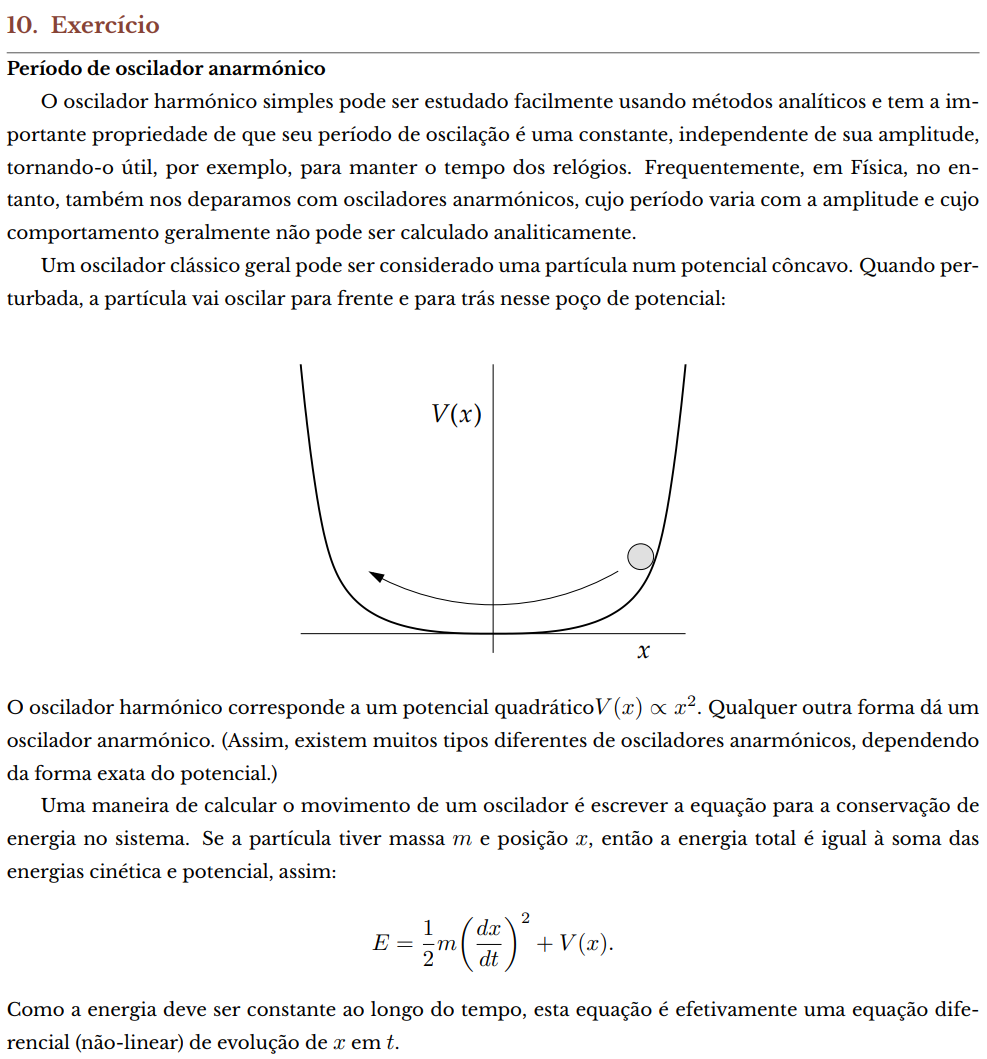
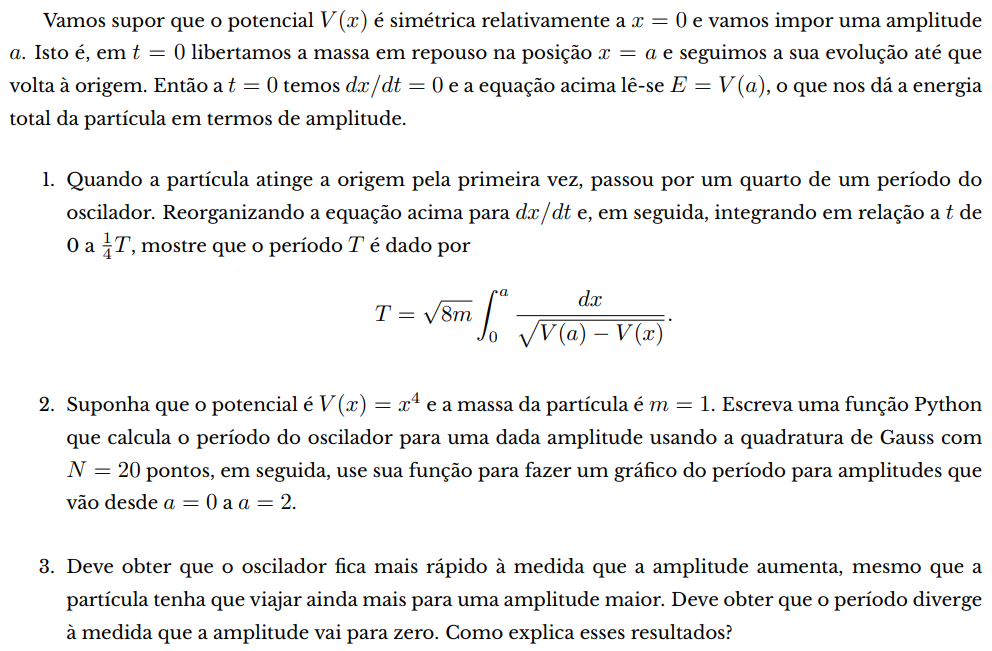

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Testes import Integrais as test

from typing import Callable

# Alínea 1

A energia total do sistema é $E = V(a)$, pelo que a equação diferencial é então:

$$
\begin{align*}

V(a) = \frac12m\left(\frac{dx}{dt}\right)^2 + V(x) &\hArr \left(\frac{dx}{dt}\right)^2 = \frac{2(V(a) - V(x))}{m}
\\\\

&\hArr \pm\sqrt{\frac{m}{2(V(a) - V(x))}}\frac{dx}{dt} = 1
\\\\\

&\hArr \pm\sqrt{\frac m2}\frac{1}{\sqrt{V(a) - V(x)}}\frac{dx}{dt} = 1

\end{align*}
$$

Integrando $t$ de $0$ a $\Tau/4$ obtemos um intervalo de tempo correspondente a um quarto de período, sendo que temos de escolher a raiz negativa já que a posição está a diminuir:

$$
\begin{align*}

-\sqrt{\frac m2}\int_0^{\Tau/4}\frac{1}{\sqrt{V(a) - V(x)}}\frac{dx}{dt} = \int_0^{\Tau/4} 1\ dt &\hArr
-\sqrt{\frac m2}\int_a^0\frac{dx}{\sqrt{V(a) - V(x)}} = \frac{\Tau}{4}
\\\\

&\hArr \Tau = \sqrt{8m}\int_0^a\frac{dx}{\sqrt{V(a) - V(x)}} 

\end{align*}
$$


## Alínea 2

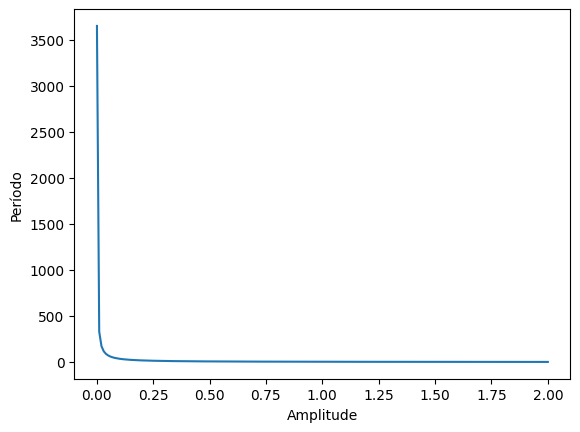

In [7]:
def quadgausseasy(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar zeros e pesos
    xx, ww = np.polynomial.legendre.leggauss(n)

    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)


def periodo(V: Callable, a: float, n: int, m: float):
    """
        Usa a expressão acima para determinar o período de movimento de uma partícula de massa `m` que é um oscilador anarmónico cujo potencial é `V(x)` e a amplitude de movimento é `a` usando quadratura gaussiana com `n` pontos.
    """

    integral = quadgausseasy(0, a, lambda x: 1 / (V(a) - V(x))**0.5, n)
    return (8 * m)**0.5 * integral


def V(x: float) -> float:
    return x**4


aa = np.linspace(0.001, 2, 200)
tt = [periodo(V, a, 20, 1) for a in aa]

plt.plot(aa, tt)
plt.xlabel("Amplitude")
plt.ylabel("Período")
plt.show()

Podemos ainda verificar que de facto para $V(x) = x^2$ o período é independente da amplitude inicial do movimento!

[4.357940005477273, 4.357940005477271, 4.357940005477264, 4.357940005477266, 4.3579400054772695, 4.357940005477268, 4.3579400054772695, 4.3579400054772695, 4.357940005477269, 4.357940005477268, 4.3579400054772695, 4.357940005477268, 4.35794000547727, 4.357940005477268, 4.357940005477266, 4.357940005477265, 4.357940005477267, 4.357940005477266, 4.35794000547727, 4.357940005477267, 4.357940005477266, 4.357940005477267, 4.357940005477267, 4.357940005477267, 4.357940005477269, 4.357940005477267, 4.357940005477264, 4.357940005477262, 4.357940005477264, 4.357940005477266, 4.357940005477269, 4.357940005477261, 4.357940005477269, 4.357940005477265, 4.357940005477266, 4.357940005477266, 4.357940005477264, 4.357940005477268, 4.3579400054772695, 4.357940005477266, 4.357940005477268, 4.357940005477264, 4.357940005477268, 4.357940005477264, 4.357940005477266, 4.357940005477263, 4.357940005477269, 4.357940005477264, 4.357940005477269, 4.357940005477264, 4.357940005477267, 4.357940005477269, 4.357940

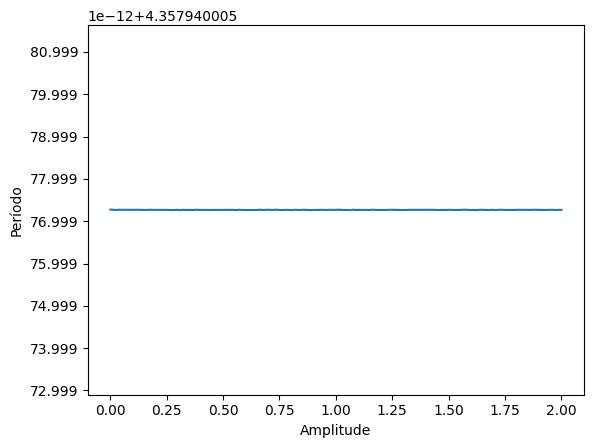

In [9]:
def V(x: float) -> float:
    return x**2


aa = np.linspace(0.001, 2, 200)
tt = [periodo(V, a, 20, 1) for a in aa]

plt.plot(aa, tt)
plt.xlabel("Amplitude")
plt.ylabel("Período")
plt.show()

## Alínea 3

Vamos adimensionalizar a função que está a ser integrada, sendo $y = x/a$:

$$
\begin{align*}

\Tau &= \sqrt{8m}\int_0^a\frac{dx}{\sqrt{V(a) - V(x)}}
\\\\

&= \sqrt{8m}\int_0^a\frac{dx}{\sqrt{a^4 - x^4}}
\\\\

&= \sqrt{8m}\int_0^a\frac{dx}{a^2\sqrt{1 - (x/a)^4}}
\\\\

&= \frac{\sqrt{8m}}{a}\int_0^1\frac{d(x/a)}{\sqrt{1 - (x/a)^4}}
\\\\

&= \frac{\sqrt{8m}}{a}\int_0^1\frac{dy}{\sqrt{1 - y^4}}

\end{align*}
$$

Ou seja, podemos perceber que o período é proporcional a $1/a$! É por isso que diverge para oscilações de pequena amplitude.